## Loading the Data 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

data= pd.read_csv(r'exam_score.csv',header=None)
data.head(5)

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


##  Splitting the data into train and test

In [2]:
X_train,X_test,y_train,y_test=train_test_split(data[[0,1]],data[[2]].astype(int),
                                               test_size=0.3,random_state=1,stratify=data[[2]].astype(int))

## Fitting a logistic model 

In [3]:

logit = linear_model.LogisticRegression()
logit.fit(X_train, y_train[2].values.astype(int))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
### We can see from the results that the predicion from logistic regression are
### values which are 0 and 1

logit.predict(X_test) ## Predicted Values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
y_test[2].values.astype(int) ## Actual Values

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1])

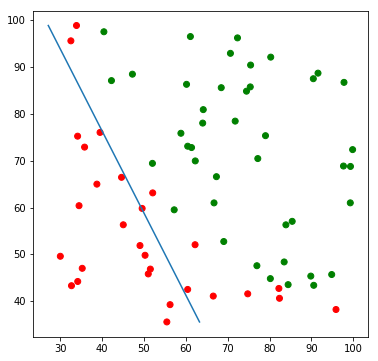

In [5]:
color = ['red', 'green']
y_color = [color[i] for i in y_train[2].values.astype(int)]

plt.figure(figsize=(6, 6))
plt.scatter(X_train[0].values,X_train[1].values, c=y_color)
plt.plot((- logit.coef_[0][1] * np.array((min(X_train[1].values), max(X_train[1].values))) - logit.intercept_[0]) / 
         logit.coef_[0][0], np.array((min(X_train[1].values), max(X_train[1].values))))
plt.show()
